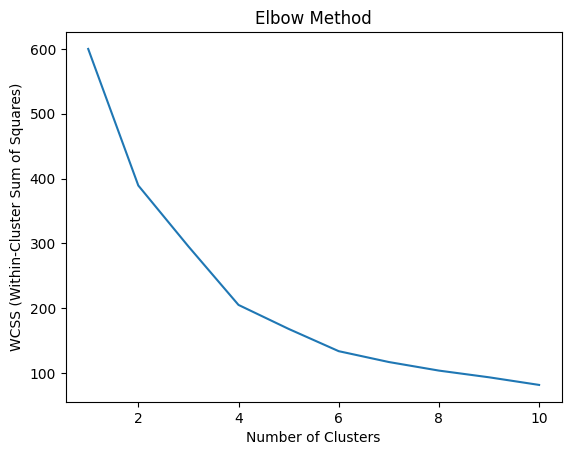

<ipython-input-7-403efdf47023>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes.loc[:, 'Cluster'] = clusters


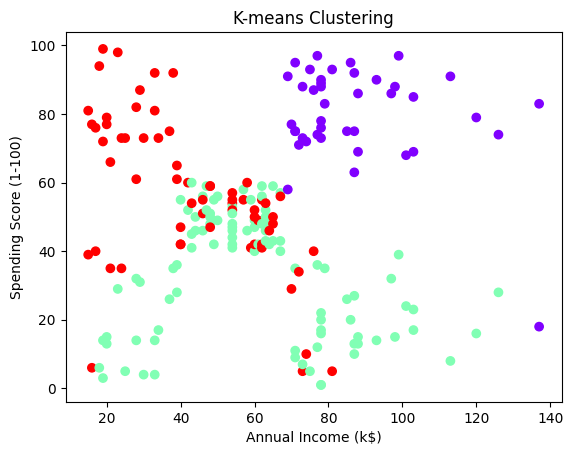

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        2
1     21                  15                      81        2
2     20                  16                       6        2
3     23                  16                      77        2
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        0
196   45                 126                      28        1
197   32                 126                      74        0
198   32                 137                      18        0
199   30                 137                      83        0

[200 rows x 4 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Atribut yang akan digunakan untuk clustering
attributes = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Preprocessing Data
scaler = StandardScaler()
scaled_attributes = scaler.fit_transform(attributes)

# Metode Elbow guna menentukan jumlah cluster yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_attributes)
    wcss.append(kmeans.inertia_)

# Visualisasi Dengan Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Pilih jumlah cluster berdasarkan Elbow Method (K=3)
k_elbow = 3

# Implementasi K-means dengan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=k_elbow, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_attributes)

# Menambahkan kolom cluster ke dataframe dengan menggunakan .loc
attributes.loc[:, 'Cluster'] = clusters

# Visualisasi hasil clustering
plt.scatter(attributes['Annual Income (k$)'], attributes['Spending Score (1-100)'], c=attributes['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.show()

# Menampilkan hasil clustering
print(attributes)
